In [8]:
from dev.NeuralForceField.train import *
from dev.NeuralForceField.graphs import * 
import numpy as np

In [2]:
# ethanol data 
train = np.load('/home/wwj/data/ethanol_ccsd_t-train.npz')
xyz_data = np.dstack((np.array([train.f.z]*1000).reshape(1000, -1, 1), np.array(train.f.R)))
force_data = train.f.F
energy_data = train.f.E.squeeze() - train.f.E.mean()
smiles_data = ["COC"] * 1000

In [3]:
# initialize parameters
par = dict()

par["git_commit"] = "9129a434b318ab26ee890281f531f304fb499ca7"
par["model_type"] = "schnet"
par["n_filters"] = 256
par["n_gaussians"] = 32
par["n_atom_basis"] = 256
par["optim"] = 1e-4
par["scheduler"] = True
par["train_percentage"] = 0.8
par["T"] = 10
par["batch_size"] = 100
par["cutoff"] = 5.0 
par["max_epoch"] = 1000
par["trainable_gauss"] = True
par["rho"] = 0.1
par["eps"] = 1e-1

graph_data = load_graph_data(xyz_data=xyz_data, energy_data=energy_data, smiles_data=smiles_data,
                             batch_size=par["batch_size"], cutoff=par["cutoff"], 
                             force_data=force_data, au_flag=False)

Finished Batching 10 Batches


setting up directoires for saving training files
epoch 0  U train: 7.885  force train 18.692
epoch 1  U train: 3.330  force train 14.372
epoch 2  U train: 2.863  force train 10.972
epoch 3  U train: 3.362  force train 8.729
epoch 4  U train: 2.220  force train 7.200
forcesmae 6.4172063 kcal/mol A
energiesmae 1.7209392 kcal/mol


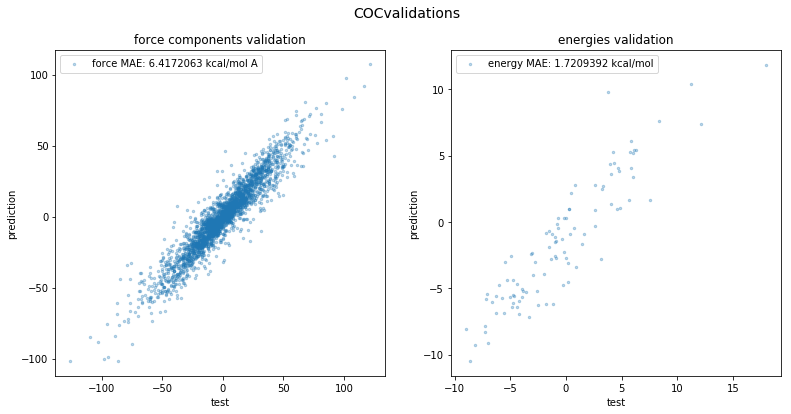

In [4]:
model = Model(par=par, graph_data=graph_data, device=0, job_name="test", train_flag= True, graph_batching=False, root='./log/')

model.train(5)
model.validate()

